In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt 

# 1. 데이터 가져오기 / 정한슬

## open api를 python에서 쉽게 사용하기 위해 저자들이 개발한 pyupbit 모듈 설치

In [ ]:
pip install -U pyupbit

     |████████████████████████████████| 103 kB 5.3 MB/s 


In [ ]:
import pyupbit

print(pyupbit.Upbit)

<class 'pyupbit.exchange_api.Upbit'>


## 티커 조회 (마켓 이름)
 - 우리는 여기서 비트코인(bitcoin), KRW-BTC 사용 예정

In [ ]:
import requests

url = "https://api.upbit.com/v1/market/all?isDetails=false"

headers = {"Accept": "application/json"}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"market":"KRW-BTC","korean_name":"비트코인","english_name":"Bitcoin"},{"market":"KRW-ETH","korean_name":"이더리움","english_name":"Ethereum"},{"market":"BTC-ETH","korean_name":"이더리움","english_name":"Ethereum"},{"market":"BTC-LTC","korean_name":"라이트코인","english_name":"Litecoin"},{"market":"BTC-XRP","korean_name":"리플","english_name":"Ripple"},{"market":"BTC-ETC","korean_name":"이더리움클래식","english_name":"Ethereum Classic"},{"market":"BTC-OMG","korean_name":"오미세고","english_name":"OmiseGo"},{"market":"BTC-CVC","korean_name":"시빅","english_name":"Civic"},{"market":"BTC-DGB","korean_name":"디지바이트","english_name":"DigiByte"},{"market":"BTC-SC","korean_name":"시아코인","english_name":"Siacoin"},{"market":"BTC-SNT","korean_name":"스테이터스네트워크토큰","english_name":"Status Network Token"},{"market":"BTC-WAVES","korean_name":"웨이브","english_name":"Waves"},{"market":"BTC-NMR","korean_name":"뉴메레르","english_name":"Numeraire"},{"market":"BTC-XEM","korean_name":"넴","english_name":"NEM"},{"market":"BTC-QTUM","korean_name":"퀀

- KRW-BTC 분 캔들

In [ ]:
import requests

url = "https://api.upbit.com/v1/candles/minutes/1?market=KRW-BTC&count=1"  #/minutes/1?market 1분
                                                                           #/minutes/10?market 10분

headers = {"Accept": "application/json"}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"market":"KRW-BTC","candle_date_time_utc":"2022-01-05T04:59:00","candle_date_time_kst":"2022-01-05T13:59:00","opening_price":56446000.00000000,"high_price":56477000.00000000,"low_price":56384000.00000000,"trade_price":56453000.00000000,"timestamp":1641358765757,"candle_acc_trade_price":151798527.35714000,"candle_acc_trade_volume":2.69038072,"unit":1}]


- 최근 체결 내역

In [ ]:
import requests

url = "https://api.upbit.com/v1/trades/ticks?market=KRW-BTC&count=1"

headers = {"Accept": "application/json"}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"market":"KRW-BTC","trade_date_utc":"2022-01-05","trade_time_utc":"04:59:25","timestamp":1641358765000,"trade_price":56453000.00000000,"trade_volume":0.00428000,"prev_closing_price":56023000.00000000,"change_price":430000.00000000,"ask_bid":"ASK","sequential_id":1641358765000000}]


- 현재가 정보 조회

In [ ]:
import requests

url = "https://api.upbit.com/v1/ticker?markets=KRW-BTC"

headers = {"Accept": "application/json"}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"market":"KRW-BTC","trade_date":"20220105","trade_time":"045925","trade_date_kst":"20220105","trade_time_kst":"135925","trade_timestamp":1641358765000,"opening_price":56023000.0,"high_price":56677000.0,"low_price":56001000.0,"trade_price":56453000.0,"prev_closing_price":56023000.00000000,"change":"RISE","change_price":430000.00000000,"change_rate":0.0076754190,"signed_change_price":430000.00000000,"signed_change_rate":0.0076754190,"trade_volume":0.00428,"acc_trade_price":75079172072.463720000,"acc_trade_price_24h":320529423591.08692000,"acc_trade_volume":1331.26121939,"acc_trade_volume_24h":5660.49940000,"highest_52_week_price":82700000.00000000,"highest_52_week_date":"2021-11-09","lowest_52_week_price":31662000.00000000,"lowest_52_week_date":"2021-01-22","timestamp":1641358765757}]


- 과거 데이터 조회
 - 매일 9시 기록

In [ ]:
import pyupbit
 
df = pyupbit.get_ohlcv("KRW-BTC")
print(df)

                           open        high  ...        volume         value
2021-06-20 09:00:00  42088000.0  42443000.0  ...  13184.495902  5.427276e+11
2021-06-21 09:00:00  41843000.0  42048000.0  ...  23102.561338  9.008327e+11
2021-06-22 09:00:00  37397000.0  39068000.0  ...  29986.869584  1.100786e+12
2021-06-23 09:00:00  37784000.0  40099000.0  ...  17696.395168  6.903951e+11
2021-06-24 09:00:00  39077000.0  40705000.0  ...  11788.006430  4.603288e+11
...                         ...         ...  ...           ...           ...
2022-01-01 09:00:00  56784000.0  58271000.0  ...   2628.145965  1.510645e+11
2022-01-02 09:00:00  57915000.0  58300000.0  ...   3567.505712  2.052913e+11
2022-01-03 09:00:00  57540000.0  57749000.0  ...   6304.958564  3.600635e+11
2022-01-04 09:00:00  56640000.0  57685000.0  ...   6053.445802  3.425126e+11
2022-01-05 09:00:00  56023000.0  56677000.0  ...   1331.615319  7.509916e+10

[200 rows x 6 columns]


In [ ]:
df

,open,high,low,close,volume,value
2021-06-20 09:00:00,42088000.0,42443000.0,39785000.0,41842000.0,13184.495902,5.427276e+11
2021-06-21 09:00:00,41843000.0,42048000.0,36802000.0,37393000.0,23102.561338,9.008327e+11
2021-06-22 09:00:00,37397000.0,39068000.0,33900000.0,37784000.0,29986.869584,1.100786e+12
2021-06-23 09:00:00,37784000.0,40099000.0,36726000.0,39077000.0,17696.395168,6.903951e+11
2021-06-24 09:00:00,39077000.0,40705000.0,37770000.0,40098000.0,11788.006430,4.603288e+11
...,...,...,...,...,...,...
2022-01-01 09:00:00,56784000.0,58271000.0,56762000.0,57915000.0,2628.145965,1.510645e+11
2022-01-02 09:00:00,57915000.0,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11
2022-01-03 09:00:00,57540000.0,57749000.0,56133000.0,56641000.0,6304.958564,3.600635e+11
2022-01-04 09:00:00,56640000.0,57685000.0,56000000.0,56023000.0,6053.445802,3.425126e+11


- 당일 하루 1분씩 조회 

In [ ]:
df1 = pyupbit.get_ohlcv("KRW-BTC", interval="minute1")
print(df1)

                           open        high  ...    volume         value
2022-01-05 10:40:00  56415000.0  56431000.0  ...  2.615698  1.475571e+08
2022-01-05 10:41:00  56425000.0  56483000.0  ...  3.137228  1.770816e+08
2022-01-05 10:42:00  56452000.0  56501000.0  ...  4.703617  2.655293e+08
2022-01-05 10:43:00  56500000.0  56509000.0  ...  5.590329  3.157452e+08
2022-01-05 10:44:00  56450000.0  56470000.0  ...  2.913548  1.644453e+08
...                         ...         ...  ...       ...           ...
2022-01-05 13:55:00  56420000.0  56443000.0  ...  0.973458  5.492561e+07
2022-01-05 13:56:00  56420000.0  56437000.0  ...  1.845705  1.041436e+08
2022-01-05 13:57:00  56417000.0  56437000.0  ...  2.890894  1.630872e+08
2022-01-05 13:58:00  56400000.0  56447000.0  ...  4.745861  2.677791e+08
2022-01-05 13:59:00  56446000.0  56477000.0  ...  3.087981  1.742442e+08

[200 rows x 6 columns]


## 2021/12 한달치 분당 

In [ ]:
import pandas as pd
import pyupbit

from datetime import datetime, time, date, timedelta
from calendar import monthrange
from time import sleep

In [ ]:
year = 2021
month = 12
YYYYMM = str(year) + '{0:02d}'.format(month)

# 해당 년월 마지막 일(28일, 30일, 31일)
end_day = monthrange(year, month)[1]

my_ticker = "KRW-BTC"
my_interval = "minutes1"

now = datetime.now()

In [ ]:
def get_upbit_ohlcv(now, ticker, year, month):
    df = pd.DataFrame(columns=['open', 'high', 'low', 'close', 'volume'])

    # 해당 년월 1일부터
    from_date = date(year, month, 1)

    # 해당 년월 마지막 일(28일, 30일, 31일)
    end_day = monthrange(year, month)[1]
    to_date = date(year, month, end_day)
    
    # 해당 년월 마지막 일자가 현재 프로그램 수행일자보다 큰 경우
    if to_date >= now.date():
        to_date = now.date()
        end_day = to_date.day
    
    temp_list = []
    # 해당 년월 1일부터 말일(또는 프로그램 수행일자)까지 데이터 수집 실시
    for day in range(1, end_day+1):
        cnt = 200 # default
        base_time = datetime.combine(from_date, time(3, 20, 0))
        # print(base_time)
        for i in range(8):
            try:
                df_temp = pyupbit.get_ohlcv(ticker, interval='minute1', count=cnt, to=base_time)
                # print(i, 'base_time:', base_time, 'shape:', df_temp.shape)
                df = pd.concat([df, df_temp], axis=0)
                if i == 6:
                    base_time += timedelta(hours=0, minutes=40)
                else:
                    base_time += timedelta(hours=3, minutes=20)
            except Exception as e:
                print('Exception:', e)
            
        from_date = from_date + timedelta(days=1)
        sleep(0.5)
        
    return df

In [ ]:
df = get_upbit_ohlcv(now, ticker=my_ticker, year=year, month=month)
df

,open,high,low,close,volume,value
2021-12-01 09:00:00,70771000.0,70822000.0,70700000.0,70719000.0,9.234089,6.532091e+08
2021-12-01 09:01:00,70743000.0,70779000.0,70714000.0,70714000.0,9.732817,6.883343e+08
2021-12-01 09:02:00,70706000.0,70717000.0,70553000.0,70553000.0,17.325307,1.223836e+09
2021-12-01 09:03:00,70556000.0,70567000.0,70507000.0,70521000.0,15.076560,1.063433e+09
2021-12-01 09:04:00,70526000.0,70630000.0,70511000.0,70616000.0,12.208826,8.615437e+08
...,...,...,...,...,...,...
2022-01-01 08:55:00,56820000.0,56821000.0,56768000.0,56768000.0,2.444209,1.387907e+08
2022-01-01 08:56:00,56768000.0,56775000.0,56762000.0,56769000.0,2.030722,1.152749e+08
2022-01-01 08:57:00,56766000.0,56776000.0,56763000.0,56770000.0,4.879123,2.769724e+08
2022-01-01 08:58:00,56766000.0,56770000.0,56668000.0,56740000.0,12.165039,6.898896e+08


# 2. 데이터 전처리 / 김호준
## 2.1 데이터 확인 및 중복값 제거
## 2.2 훈련 데이터 생성(2021.12.01 ~ 2021.12.31) - 익일 08시 59분까지
### 2.2.1 훈련 데이터 (2021.12.01 ~ 2021.12.31) 시세 시각화
## 2.3 검증 데이터 생성(2022.01.01 ~ 2022.01.03) - 익일 08시 59분까지
### 2.3.1 검증 데이터 (2022.01.01 ~ 2022.01.03) 시세 시각화

## 2.1 데이터 확인 및 중복값 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49600 entries, 2021-12-01 09:00:00 to 2022-01-01 08:59:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    49600 non-null  float64
 1   high    49600 non-null  float64
 2   low     49600 non-null  float64
 3   close   49600 non-null  float64
 4   volume  49600 non-null  float64
 5   value   49600 non-null  float64
dtypes: float64(6)
memory usage: 2.6 MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [ ]:
df

,open,high,low,close,volume,value
2021-12-01 09:00:00,70771000.0,70822000.0,70700000.0,70719000.0,9.234089,6.532091e+08
2021-12-01 09:01:00,70743000.0,70779000.0,70714000.0,70714000.0,9.732817,6.883343e+08
2021-12-01 09:02:00,70706000.0,70717000.0,70553000.0,70553000.0,17.325307,1.223836e+09
2021-12-01 09:03:00,70556000.0,70567000.0,70507000.0,70521000.0,15.076560,1.063433e+09
2021-12-01 09:04:00,70526000.0,70630000.0,70511000.0,70616000.0,12.208826,8.615437e+08
...,...,...,...,...,...,...
2022-01-01 08:55:00,56820000.0,56821000.0,56768000.0,56768000.0,2.444209,1.387907e+08
2022-01-01 08:56:00,56768000.0,56775000.0,56762000.0,56769000.0,2.030722,1.152749e+08
2022-01-01 08:57:00,56766000.0,56776000.0,56763000.0,56770000.0,4.879123,2.769724e+08
2022-01-01 08:58:00,56766000.0,56770000.0,56668000.0,56740000.0,12.165039,6.898896e+08


In [ ]:
print(df['close'].is_unique)

False


In [ ]:
df = df.drop_duplicates(subset=['close'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8861 entries, 2021-12-01 09:00:00 to 2022-01-01 08:59:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    8861 non-null   float64
 1   high    8861 non-null   float64
 2   low     8861 non-null   float64
 3   close   8861 non-null   float64
 4   volume  8861 non-null   float64
 5   value   8861 non-null   float64
dtypes: float64(6)
memory usage: 484.6 KB


<이상치 제거>

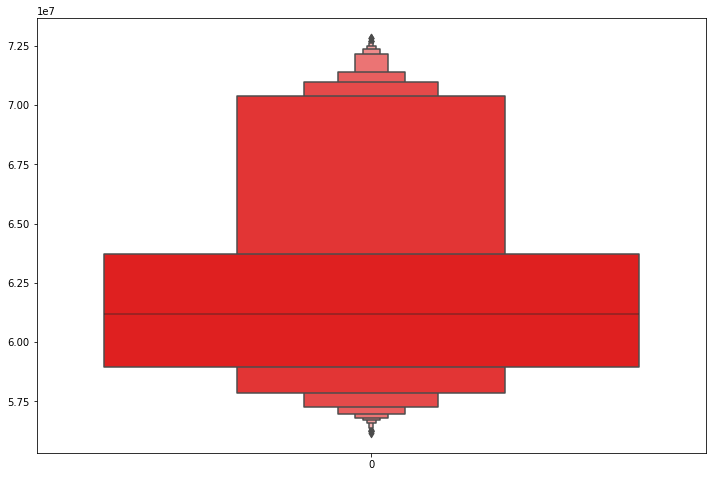

In [ ]:
# 이상치 boxplot
plt.figure(figsize=(12,8))
sns.boxenplot(data=df['close'], color='red')
plt.show()

In [ ]:
df['close'].describe()

count    8.861000e+03
mean     6.245451e+07
std      4.565463e+06
min      5.617100e+07
25%      5.896900e+07
50%      6.120700e+07
75%      6.369800e+07
max      7.283300e+07
Name: close, dtype: float64

In [ ]:
# 이상치 계산법: 1분위선 - 1.5*(3분위선 - 1분위선) or 3분위선 + 1.5*(3분위선-1분위선)
q1=df['close'].quantile(0.25)
q2=df['close'].quantile(0.5)
q3=df['close'].quantile(0.75)
iqr=q3-q1
iqr

4729000.0

In [ ]:
condition=df['close']>q3+1.5*iqr
df[condition]

,open,high,low,close,volume,value
2021-12-01 09:05:00,70616000.0,70818000.0,70572000.0,70796000.0,8.281527,5.854336e+08
2021-12-01 09:06:00,70799000.0,70999000.0,70796000.0,70992000.0,17.183463,1.218164e+09
2021-12-01 09:07:00,70992000.0,71090000.0,70939000.0,71069000.0,14.662377,1.041235e+09
2021-12-01 09:08:00,71058000.0,71112000.0,71000000.0,71043000.0,8.990080,6.387810e+08
2021-12-01 09:09:00,71043000.0,71052000.0,70990000.0,71003000.0,6.974585,4.952721e+08
...,...,...,...,...,...,...
2021-12-03 21:08:00,70968000.0,70990000.0,70968000.0,70969000.0,9.382370,6.659223e+08
2021-12-03 21:14:00,70856000.0,70900000.0,70856000.0,70895000.0,9.299245,6.592537e+08
2021-12-03 21:29:00,70849000.0,70883000.0,70792000.0,70882000.0,6.734647,4.768911e+08
2021-12-03 22:36:00,71071000.0,71074000.0,71015000.0,71059000.0,16.832362,1.195819e+09


In [ ]:
# a=df[condition].index
# df.drop(a,inplace=True)
# 사분위선 q1 - 1.5(q3-q1) | q3 + 1.5(q3-q1) 이면 drop
# 하지만 boxplot 확인 결과와 연속형 변수 데이터라는 점에서 이상치제거를 하지 않겠다는 의견

## 2.2 훈련 데이터 생성(2021.12.01 ~ 2021.12.31) - 익일 08시 59분까지

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# feature = ['open', 'high', 'low', 'volume', 'value'] label = ['close']
scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['open', 'high', 'close', 'low', 'volume', 'value']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.87709868, 0.87782397, 0.87312447, 0.88013412, 0.02904977,
        0.03615285],
       [0.87540766, 0.87523345, 0.87282439, 0.88097234, 0.03061936,
        0.03809758],
       [0.87317309, 0.87149828, 0.86316169, 0.87133277, 0.05451439,
        0.06774596],
       ...,
       [0.04052422, 0.04114706, 0.0453727 , 0.05454437, 0.00382336,
        0.00382794],
       [0.03140476, 0.03156817, 0.03589005, 0.04562328, 0.00637938,
        0.00636978],
       [0.02735838, 0.03217061, 0.0367903 , 0.04191115, 0.01686464,
        0.01683433]])

In [ ]:
df2 = pd.DataFrame(scaled, columns= scale_cols) # x_train data

In [ ]:
x_train = df2.drop('close',1) # feature = ['open', 'high', 'low', 'volume', 'value']

In [ ]:
y_train = df2['close'] # label = ['close']

In [ ]:
x_train.shape, y_train.shape 

((8861, 5), (8861,))

### 2.2.1 훈련 데이터 (2021.12.01 ~ 2021.12.31) 시세 시각화

Text(0, 0.5, 'price')

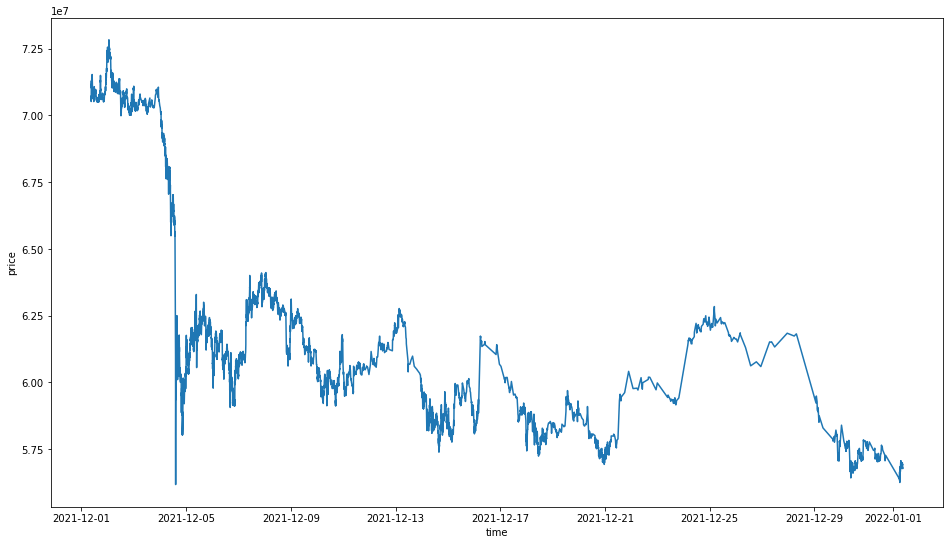

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['close'], x=df.index)
plt.xlabel('time')
plt.ylabel('price')

## 2.2-번외: 현재 시세 기준 이동평균선을 이용한 추세파악

In [ ]:
df_c = pyupbit.get_ohlcv("KRW-BTC")

In [ ]:
# 5일 이동평균 계산
ma5 = df_c['close'].rolling(window=5).mean() 

# 10일 이동평균 계산
ma10 = df_c['close'].rolling(window=10).mean()

In [ ]:
ma5 = ma5.reset_index()
ma10 = ma10.reset_index()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=ma5['index'], y=ma5['close'],
              name='이동평균선 5분')
)
fig.add_trace(
    go.Scatter(x=ma10['index'], y=ma10['close'],
              name='이동평균선 10분')
)
fig.update_layout(
    title_text = '종가기준 이동평균선 시각화',
    yaxis_tickformat = ','
)
fig.show()

In [ ]:
price = pyupbit.get_current_price(my_ticker)

In [ ]:
last_ma5 = ma5['close'].iloc[-2]

In [ ]:
if price > last_ma5:
    print('상승장 입니다.')
else:
    print('하락장 입니다.')

하락장 입니다.


In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=ma5['index'], y=ma5['close'],
              name='이동평균선 5분')
)
fig.add_trace(
    go.Scatter(x=ma10['index'], y=ma10['close'],
              name='이동평균선 10분')
)
fig.add_trace(
    go.Scatter(x=[datetime.today().date()], y=[price],
              name='현재가격')
)
fig.update_layout(
    title_text = '종가기준 이동평균선 시각화',
    yaxis_tickformat = ','
)
fig.show()

## 2.3 검증 데이터 생성(2022.01.01 ~ 2022.01.03) - 익일 08시 59분까지

In [ ]:
df_valid = get_upbit_ohlcv(now, ticker=my_ticker, year=2022, month=1)
df_valid

,open,high,low,close,volume,value
2022-01-01 09:00:00,56784000.0,56784000.0,56762000.0,56784000.0,7.226950,4.102409e+08
2022-01-01 09:01:00,56784000.0,56876000.0,56764000.0,56811000.0,7.188775,4.081979e+08
2022-01-01 09:02:00,56876000.0,56941000.0,56814000.0,56890000.0,5.121608,2.913801e+08
2022-01-01 09:03:00,56881000.0,56916000.0,56848000.0,56869000.0,6.890893,3.919717e+08
2022-01-01 09:04:00,56892000.0,56895000.0,56833000.0,56868000.0,3.857810,2.194228e+08
...,...,...,...,...,...,...
2022-01-05 13:57:00,56417000.0,56437000.0,56400000.0,56402000.0,2.890894,1.630872e+08
2022-01-05 13:58:00,56400000.0,56447000.0,56383000.0,56447000.0,4.745861,2.677791e+08
2022-01-05 13:59:00,56446000.0,56477000.0,56384000.0,56449000.0,4.542710,2.563593e+08
2022-01-05 14:00:00,56448000.0,56474000.0,56403000.0,56449000.0,3.961444,2.236209e+08


In [ ]:
print(df_valid['close'].is_unique)

False


In [ ]:
df_valid = df_valid.drop_duplicates(subset=['close'])

In [ ]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1708 entries, 2022-01-01 09:00:00 to 2022-01-05 13:33:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1708 non-null   float64
 1   high    1708 non-null   float64
 2   low     1708 non-null   float64
 3   close   1708 non-null   float64
 4   volume  1708 non-null   float64
 5   value   1708 non-null   float64
dtypes: float64(6)
memory usage: 93.4 KB


In [ ]:
# feature = ['open', 'high', 'low', 'volume', 'value'] label = ['close']
scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols_f = ['open', 'high', 'close', 'low', 'volume', 'value']
# 스케일 후 columns
scaled_f = scaler.fit_transform(df_valid[scale_cols])
scaled_f

array([[0.34357174, 0.33537922, 0.34357174, 0.33627538, 0.1024148 ,
        0.102026  ],
       [0.34357174, 0.37571241, 0.35541904, 0.33715799, 0.1018715 ,
        0.10151571],
       [0.38394032, 0.40420868, 0.39008337, 0.3592233 , 0.07245275,
        0.07233798],
       ...,
       [0.22773146, 0.21964051, 0.2220272 , 0.22153575, 0.02748518,
        0.02725269],
       [0.21895568, 0.22270934, 0.23036419, 0.22065313, 0.02246237,
        0.02227035],
       [0.22553752, 0.22270934, 0.22860904, 0.2250662 , 0.02852788,
        0.02828713]])

In [ ]:
df2_f = pd.DataFrame(scaled_f, columns= scale_cols_f) # x_train data

In [ ]:
x_test = df2_f.drop('close',1) # feature = ['open', 'high', 'low', 'volume', 'value']

In [ ]:
y_test = df2_f['close'] # label = ['close']

In [ ]:
x_test.shape, y_test.shape

((1708, 5), (1708,))

### 2.3.1 검증 데이터 (2022.01.01 ~ 2022.01.03) 시각화

Text(0, 0.5, 'price')

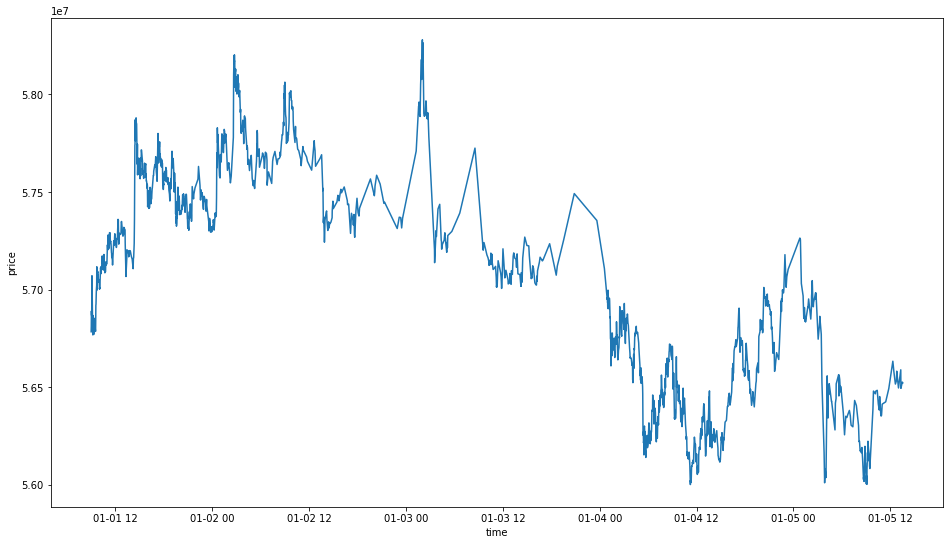

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df_valid['close'], x=df_valid.index)
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
# 최종 데이터
print("훈련 데이터 \n")
print(x_train.shape,x_train,y_train.shape,y_train)
print("검증 데이터 \n")
print(x_test.shape,x_test,y_test.shape,y_test)

훈련 데이터 

(8861, 5)           open      high       low    volume     value
0     0.877099  0.877824  0.880134  0.029050  0.036153
1     0.875408  0.875233  0.880972  0.030619  0.038098
2     0.873173  0.871498  0.871333  0.054514  0.067746
3     0.864114  0.862462  0.868579  0.047437  0.058865
4     0.862302  0.866257  0.868818  0.038412  0.047687
...        ...       ...       ...       ...       ...
8856  0.044450  0.044581  0.056460  0.009110  0.009131
8857  0.040887  0.040725  0.054365  0.012268  0.012283
8858  0.040524  0.041147  0.054544  0.003823  0.003828
8859  0.031405  0.031568  0.045623  0.006379  0.006370
8860  0.027358  0.032171  0.041911  0.016865  0.016834

[8861 rows x 5 columns] (8861,) 0       0.873124
1       0.872824
2       0.863162
3       0.861241
4       0.866943
          ...   
8856    0.047293
8857    0.044472
8858    0.045373
8859    0.035890
8860    0.036790
Name: close, Length: 8861, dtype: float64
검증 데이터 

(1708, 5)           open      high       low    vo

# 3. LSTM 모델 설계 / 정새하

In [ ]:
WINDOW_SIZE=30 #얼마동안의 기간을 학습해서 예측할 것인지
BATCH_SIZE=32

## Windowing 메소드

In [ ]:
def windowed_dataset(x, y, window_size, batch_size, shuffle):

# X값 window dataset 구성
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(window_size, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(window_size))

# y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y[window_size:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

## Model 생성 및 compile

In [ ]:
model = keras.Sequential([
# 1차원 feature map 생성
    keras.layers.Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 5]),
# LSTM
    keras.layers.LSTM(16, activation='tanh'),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()사용
loss = keras.losses.Huber()
optimizer = keras.optimizers.Adam(0.0005)
model.compile(loss=loss, optimizer=optimizer, metrics=['mse'])

## 학습

In [ ]:
# earlystopping은 35번 epoch통안 val_loss 개선이 없다면 학습 멈춤
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=35)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=100,
                    callbacks=[earlystopping])

Epoch 1/100
276/276 [==============================] - 12s 8ms/step - loss: 0.0242 - mse: 0.0485 - val_loss: 0.0014 - val_mse: 0.0027
Epoch 2/100
276/276 [==============================] - 2s 5ms/step - loss: 1.6977e-04 - mse: 3.3954e-04 - val_loss: 0.0012 - val_mse: 0.0025
Epoch 3/100
276/276 [==============================] - 2s 5ms/step - loss: 1.0470e-04 - mse: 2.0940e-04 - val_loss: 0.0011 - val_mse: 0.0022
Epoch 4/100
276/276 [==============================] - 2s 5ms/step - loss: 8.9012e-05 - mse: 1.7802e-04 - val_loss: 0.0011 - val_mse: 0.0021
Epoch 5/100
276/276 [==============================] - 2s 5ms/step - loss: 7.9148e-05 - mse: 1.5830e-04 - val_loss: 9.8696e-04 - val_mse: 0.0020
Epoch 6/100
276/276 [==============================] - 2s 5ms/step - loss: 7.6471e-05 - mse: 1.5294e-04 - val_loss: 9.4517e-04 - val_mse: 0.0019
Epoch 7/100
276/276 [==============================] - 2s 5ms/step - loss: 7.1539e-05 - mse: 1.4308e-04 - val_loss: 9.0794e-04 - val_mse: 0.0018
Epoch 8/

In [ ]:
model.save('./bitcoin_model1.h5')

# 4. 예측/ 김찬희


#Model load 및 예측

In [ ]:
print("%.7f" % (float(min(history.history['val_loss']))))

model.load_weights('./bitcoin_model1.h5')
pred = model.predict(test_data)
actual = np.asarray(y_test)[WINDOW_SIZE:]
actual = np.reshape(actual, (len(actual), 1))

print(pred.shape)
print(actual.shape)

0.0003847
(1678, 1)
(1678, 1)


#시각화


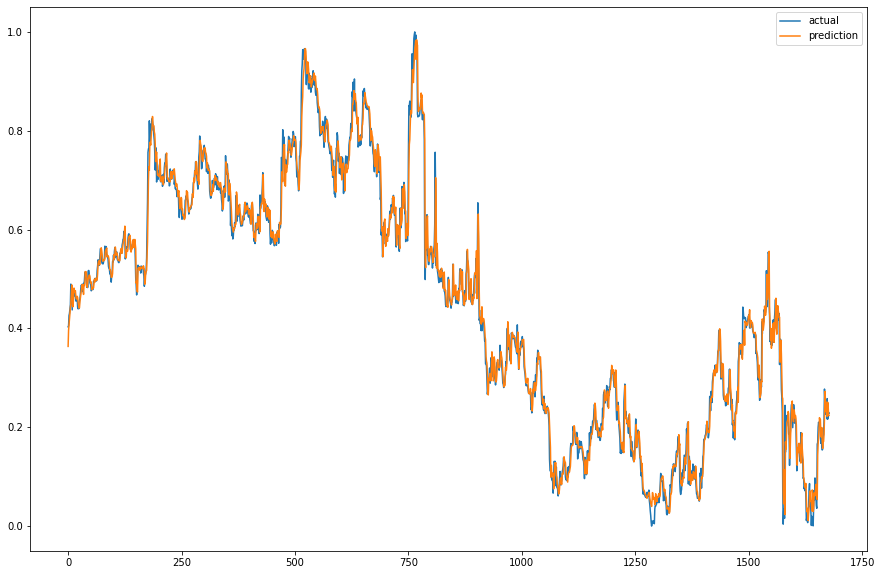

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(actual, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

#현 30분간의 누적 데이터로 1분 후 데이터 예측

In [ ]:
x_realtime = x_test.iloc[-30:,:]
y_realtime = y_test.iloc[-30:,]

live_data = windowed_dataset(x_realtime, y_realtime , 29 , 32, False)
live_pred = model.predict(live_data)

trainPredict_dataset_like = np.zeros(shape=(len(live_pred), 6) )
trainPredict_dataset_like[:,0] = live_pred[:,0]
real_pred = scaler.inverse_transform(trainPredict_dataset_like)[:,0] 

print("예측 close:",real_pred[0])

# 13:30 기준

예측 close: 56511171.97185755


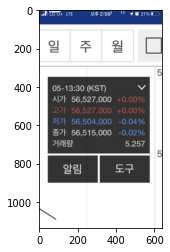

In [ ]:
from PIL import Image
 
image = Image.open("/content/drive/MyDrive/bitcoin_LSTM/current.jpg",mode='r')
 
plt.imshow(image)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 5. 모델 평가 / 박유정

In [ ]:
ev = model.evaluate(train_data, batch_size=32)
print("손실 값", ev[0], "MSE:",ev[1])

276/276 [==============================] - 1s 4ms/step - loss: 4.1979e-05 - mse: 8.3957e-05
손실 값 4.1978586523327976e-05 MSE: 8.395717304665595e-05


In [ ]:
ev= model.evaluate(test_data, batch_size=32)
print("손실 값", ev[0], "MSE:",ev[1])

53/53 [==============================] - 0s 4ms/step - loss: 3.8470e-04 - mse: 7.6940e-04
손실 값 0.0003847014158964157 MSE: 0.0007694028317928314


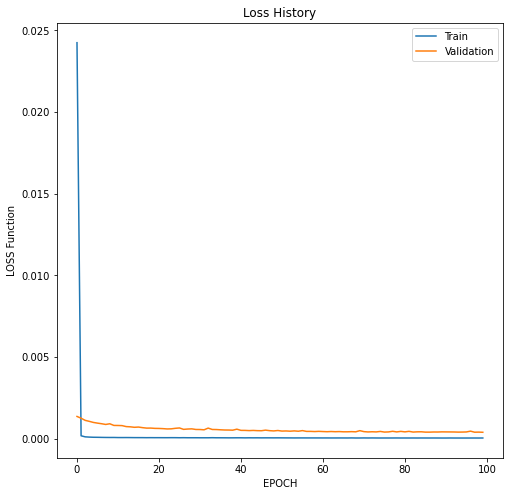

In [ ]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, label = 'Train')
plt.plot(validation_history,label = 'Validation' )
plt.legend()

- Layer(type) : 레이어 이름과 타입
- Output Shape: 아웃풋 개수, 행이 None으로 지정된 이유는 데이터의 갯수는 계속해서 추가될 수 있기 때문에 딥러닝 모델에서는 주로 행을 무시
- Param:: 입력노드와 출력노드에 연결된 간선의 수

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            832       
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,257
Trainable params: 4,257
Non-trainable params: 0
_________________________________________________________________


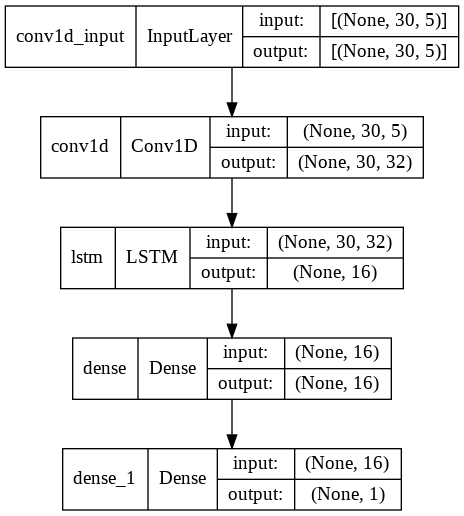

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

참고자료

https://mskim8717.tistory.com/104   
https://mooyoungblog.tistory.com/114